In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [155]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [2]:
# Data loading...
#C1 (records not containing acute hypotensive episodes)
#C2 (AHE, but not in forecast window)
#H1 (acute hypotensive episode in forecast window, treated with pressors)
#H2 (AHE in forecast window, not treated with pressors)
c1 = np.loadtxt('c1_matrix.txt') #14x600
c2 = np.loadtxt('c2_matrix.txt') #14x600
h1 = np.loadtxt('h1_matrix.txt') #14x600
h2 = np.loadtxt('h2_matrix.txt') #15x600
c1_afterT0=np.loadtxt('c1_matrix_afterT0.txt') #14x60
c2_afterT0=np.loadtxt('c2_matrix_afterT0.txt') #14x60
h1_afterT0=np.loadtxt('h1_matrix_afterT0.txt') #14x60
h2_afterT0=np.loadtxt('h2_matrix_afterT0.txt') #15x60
labels=np.loadtxt('labels.txt')

# Feature Extraction-- way 1 Linear Regression

In [133]:
#used to store the features
list_feature=[]
#store the predictions after T0
pred_afterT0=[]

Dict={'C1':c1,'C2':c2,'H1':h1,'H2':h2}
print('mean of ABPmean above the line\nmean below the line\nsize+\nsize-\n')
for k,v in Dict.items():
    print('This is',k)
    for i in range(len(v)):
        y=v[i]
        cond=np.where(((y>130)|(y<10)),-1,y)
        y=np.delete(cond,np.argwhere(cond==-1))

        x=np.arange(len(y))
        model = LinearRegression()

        model.fit(np.reshape(x,[len(x),1]), np.reshape(y,[len(y),1]))
        x_test=x_test=np.arange(len(x),len(x)+60)
        y_pred = model.predict(np.reshape(x_test,[len(x_test),1]))

        w = model.coef_[0][0] # parameters of model
        b = model.intercept_[0] #intercept of model

        g1=np.where(y>w*x+b,y,-1).flatten()
        g11=np.delete(g1,np.argwhere(g1==-1))
        g11_mean=np.mean(g11)

        g2=np.where(y<w*x+b,y,-1).flatten()
        g21=np.delete(g2,np.argwhere(g2==-1))
        g21_mean=np.mean(g21)
#         list_feature.append([g11_mean,g21_mean,len(g11),len(g21)])
        list_feature.append([g11_mean,g21_mean,len(g11)])
        pred_afterT0.append(y_pred.flatten())
        print('Patient',i+1, 'in C1:','%0.2f'%g11_mean,'%0.2f'%g21_mean,len(g11),len(g21))
        
#convert into the type of numpy.arry
list_feature=np.array(list_feature)
pred_afterT0=np.array(pred_afterT0)

mean of ABPmean above the line
mean below the line
size+
size-

This is C1
Patient 1 in C1: 97.18 85.80 282 318
Patient 2 in C1: 90.99 85.00 307 292
Patient 3 in C1: 112.81 90.68 290 266
Patient 4 in C1: 111.21 104.33 355 242
Patient 5 in C1: 105.50 94.76 274 318
Patient 6 in C1: 101.90 98.96 267 331
Patient 7 in C1: 109.74 90.02 313 287
Patient 8 in C1: 109.63 102.79 248 315
Patient 9 in C1: 92.36 77.30 321 279
Patient 10 in C1: 101.29 81.69 310 289
Patient 11 in C1: 84.00 75.87 299 301
Patient 12 in C1: 103.56 94.93 281 319
Patient 13 in C1: 82.05 75.45 242 357
Patient 14 in C1: 82.92 75.27 259 341
This is C2
Patient 1 in C1: 78.56 70.49 296 304
Patient 2 in C1: 92.29 84.19 307 292
Patient 3 in C1: 87.49 77.11 255 337
Patient 4 in C1: 75.39 62.84 270 323
Patient 5 in C1: 97.46 81.67 331 268
Patient 6 in C1: 89.66 76.51 314 285
Patient 7 in C1: 90.78 74.59 321 279
Patient 8 in C1: 119.54 95.32 194 158
Patient 9 in C1: 71.75 66.34 251 349
Patient 10 in C1: 80.31 67.58 310 288
Patient 1

# Classification --Random Forest

In [71]:
import pandas as pd  
import numpy as np  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import GridSearchCV
from sklearn import cross_validation, metrics  
import matplotlib.pylab as plt  
%matplotlib inline  

In [41]:
list_feature.shape
testsize=10
# testIdx=np.random.choice(len(list_feature), testsize,replace=False)
idx=np.random.permutation(len(list_feature))
trainIdx=idx[testsize:]
testIdx=idx[:testsize]

print(testIdx)
x_train=list_feature[trainIdx]
x_test=list_feature[testIdx]
print(trainXset.shape,testXset.shape)
y_train=labels[trainIdx]
y_test=labels[testIdx]
print(trainYset.shape,testYset.shape)

[ 2  0  3 55 14 30 17 23 16 12]
(47, 4) (10, 4)
(47,) (10,)


In [42]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()  
rf.fit(x_train,y_train)  
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',  
            max_depth=None, max_features='auto', max_leaf_nodes=None,  
            min_samples_leaf=1, min_samples_split=2,  
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,  
            oob_score=False, random_state=None, verbose=0,  
            warm_start=False)  
y_pred=rf.predict(testXset)
print (y_pred)
print(y_test)
print('the accuracy is:',accuracy_score(y_test,y_pred))

[0. 0. 1. 0. 0. 0. 0. 0. 1. 1.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
the accuracy is: 0.5


In [102]:
# fit without any custom parameters
rf0 = RandomForestClassifier(oob_score=True, random_state=10)  
rf0.fit(list_feature,labels)  
#use out-of-bag samples to estimate the generalization accuracy.
print (rf0.oob_score_)
y_predprob = rf0.predict_proba(list_feature)[:,1]
# print(y_predprob)
#use auc score to evaluate the classifier
# print ("AUC Score (Train): %f" % metrics.roc_auc_score(labels,y_predprob) )

0.6491228070175439


In [135]:
#use GridSearchCV to choose the optimal n_estimators(The number of trees in the forest)
param_test1= {'n_estimators':np.arange(3,72,3)}  
gsearch1= GridSearchCV(estimator = RandomForestClassifier(max_depth=8,max_features='sqrt',random_state=10),  
                       param_grid =param_test1, scoring='roc_auc',cv=5)  
gsearch1.fit(list_feature,labels)  
# print(gsearch1.grid_scores_)
# print(gsearch1.cv_results_.values())
print(gsearch1.best_params_)
print('Mean cross-validated score of the best_estimator :',gsearch1.best_score_)

{'n_estimators': 57}
Mean cross-validated score of the best_estimator : 0.7461988304093566


In [104]:
param_test2= {'max_depth':np.arange(2,16,2), 'min_samples_split':np.arange(2,10,2)}  
gsearch2= GridSearchCV(estimator = RandomForestClassifier(n_estimators= 57,oob_score=True,random_state=10),
                       param_grid = param_test2,scoring='roc_auc',iid=False, cv=5)  
gsearch2.fit(list_feature,labels)  
# print(gsearch2.cv_results_)
print(gsearch2.best_params_)
print(gsearch2.best_score_ )

{'max_depth': 8, 'min_samples_split': 2}
0.7405555555555556


In [118]:
# fit without any custom parameters
rf1= RandomForestClassifier(n_estimators=57, max_depth=8,criterion='gini',oob_score=True,random_state=10)    
rf1.fit(list_feature,labels)  
#use out-of-bag samples to estimate the generalization accuracy.
print (rf1.oob_score_)
y_predprob = rf1.predict_proba(list_feature)[:,1]
# print(y_predprob)
#use auc score to evaluate the classifier
# print ("AUC Score (Train): %f" % metrics.roc_auc_score(labels,y_predprob) )

0.6491228070175439


# Linear Regression-->predict

(600,)


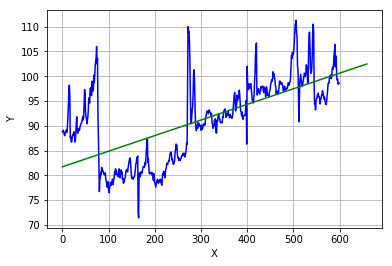

In [154]:
#Example
#the first patient in c1
y=c1[0]
#select the value between 10 and 130
cond=np.where(((y>130)|(y<10)),-1,y).flatten()
y=np.delete(cond,np.argwhere(cond==-1))
print(y.shape)
x=np.arange(len(y))

model = LinearRegression()
model.fit(np.reshape(x,[len(x),1]), np.reshape(y,[len(y),1]))
# x_test=np.arange(len(x),len(x)+60)
x_test=np.arange(len(x)+60)
y_pred = model.predict(np.reshape(x_test,[len(x_test),1]))
w = model.coef_[0][0] # parameters of model
b = model.intercept_[0] #intercept of model

plt.figure()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True) 
plt.plot(x,y,'b') 
plt.plot(x_test,y_pred,'g-') 
plt.show()

In [149]:
pred_afterT0.shape

(57, 60)

In [170]:
s=np.where(pred_afterT0>87,0,1)
counts=s.sum(axis=1)
#any period of 30 minutes or more during which at least 90% of 
#the MAP measurements were at or below 60 mmHg.
results=np.where(counts>27,1,0)
print('the accuracy is:',accuracy_score(labels,results))
print(counts)
print(results)
print(labels)

the accuracy is: 0.6491228070175439
[ 0  0  0  0  0  0  0  0  0  0 60  0 60 60 60  0  0 60  0  0 60  0 60 60
 60 60 60 60  0  0 60 60 60  0 60 60 60 60 60  0  0 60 36 60 60 60 60 60
 60 60  0  0 60 60 60 60  0]
[0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Kernel Ridge Regression

(600,)
(66000, 1)


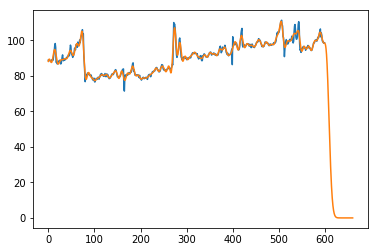

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

#Example
#the first patient in c1
y=c1[0]
#select the value between 10 and 130
cond=np.where(((y>130)|(y<10)),-1,y).flatten()
y=np.delete(cond,np.argwhere(cond==-1))
print(y.shape)
x=np.arange(len(y)).reshape(len(y),1)

x_test=np.arange(0,len(x)+60,0.01).reshape((len(x)+60)*100,1)
print(x_test.shape)
train_size=600
krr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})
krr.fit(x[:train_size], y[:train_size])
y_pred=krr.predict(x_test)
plt.plot(x,y)
plt.plot(x_test,y_pred)
plt.show()
